In [1]:
import numpy as np
import numba
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming
from time import time

#Import the helper functions and all the samplers
from BasicFunctions import *
from TabuSampler import tabu_sampler
from ZanellaSampler import zanella_sampler
from RandomWalkSampler import rw_sampler
from PointwiseSampler import pointwise_sampler 

#Autocorrelation function as implemented by Power and Goldman
@numba.njit()
def autocorr(x, lags):
    mean=np.mean(x)
    var=np.var(x)
    xp=x-mean
    corr=[1. if l==0 else np.sum(xp[l:]*xp[:-l])/len(x)/var for l in lags]
    return np.array(corr)

In [2]:
#Defining the Barker balancing functions
g = lambda t: t/(1+t)

In [3]:
#Generating the database
from DatabaseClass import create_databases

#Global parameters used
lmbd = 50
l = 15 #The number of categories for each record
p_cat = np.array([0.05, 0.15, 0.4, 0.2, 0.2]) #The pval vector for each category
beta = 0.30

p_match, x, y, M_truth, M_reverse_truth = create_databases(lmbd, l, p_cat, beta)

#Other parameters that are needed
N_1 = len(x)
N_2 = len(y)
num_gens = N_1*N_2

print("The golden truth p_match: ", p_match)
print("The number of generators: ", num_gens)
print("The first record of the x database:")
print(x[0, :])
print("The first record of the y database:")
print(y[0,:])
print("The golden truth M vector: ")
print(M_truth)

The golden truth p_match:  0.5257115179528609
The number of generators:  2256
The first record of the x database:
[0. 3. 2. 2. 3. 4. 1. 3. 2. 4. 3. 2. 2. 2. 4.]
The first record of the y database:
[2. 2. 4. 1. 4. 3. 2. 2. 4. 2. 4. 2. 2. 2. 1.]
The golden truth M vector: 
[ 7. 32. 46. 10.  0. 40. 36.  0. 30.  0. 35.  4.  0. 18. 37. 12. 38.  9.
  8. 44. 27. 23. 15. 28.  0.  5.  0.  0.  6. 43. 14.  0.  0. 22.  1. 34.
  0. 25. 45. 47. 29.  0.  0. 16. 39. 31.  2. 26.]


In [4]:
#Generate a random M and M_initial to start with
M_initial, M_reverse_initial = random_state(N_1, N_2)

print("The starting state for the simulations:")
print(M_initial)

The starting state for the simulations:
[ 0. 26.  0. 32.  0. 47.  0. 24.  0.  0.  0.  0.  9. 16. 25.  3. 27.  0.
  0.  0.  0.  0. 22. 38.  0. 17. 13.  0.  0.  0.  0.  0. 11. 14.  0. 45.
  0. 39.  0.  6.  8.  4. 23. 33. 30.  1.  0.  0.]


In [5]:
#The function that calculates the empirical matching probabilities
def prob_matching(trace, N_1, N_2, N):
    prob_matrix = np.zeros((N_1,N_2))
    for i in np.arange(0, N_1):
        x = trace[:,i]
        for j in np.arange(0, N_2):
            prob_matrix[i,j] = len(x[x == j+1])
    return (prob_matrix/N).reshape(N_1*N_2,)
            

In [6]:
#First time of running all the samplers
N = int(1e4)
T_z = 150
T_t = 300
thin_rate_z = 0.015
thin_rate_t = 0.03
print_rate = 10

M_initial, M_reverse_initial = random_state(N_1, N_2)

trace1_rw, energy_rw, hamming_rw, num_iter_rw, runtime_rw = rw_sampler(N, N_1, N_2, lmbd, p_match, M_truth,
                                                                    M_initial, M_reverse_initial, p_cat, l, beta, x,
                                                                    y, print_rate=10)

trace1_pw, energy_pw, hamming_pw, num_iter_pw, runtime_pw = pointwise_sampler(N, N_1, N_2, lmbd, p_match, g, M_truth, M_initial,
                                                                              M_reverse_initial, p_cat, l, beta, x, y, print_rate=10)

trace1_z, energy_z, hamming_z, num_iter_z, runtime_z = zanella_sampler(N_1, N_2,
                                                                                num_gens,
                                                                                M_initial, M_reverse_initial,
                                                                                g, T_z, M_truth,
                                                                                thin_rate_z, print_rate, lmbd, p_match,
                                                                                l, p_cat, beta, x, y)

trace1_t, energy_T, hamming_t, alpha, num_iter_t, runtime_t = tabu_sampler(N_1, N_2,
                                                                                num_gens,
                                                                                M_initial, M_reverse_initial,
                                                                                g, T_t, M_truth,
                                                                                thin_rate_t, print_rate, lmbd, p_match,
                                                                                l, p_cat, beta, x, y)


Percent: [--------------------------------------->] 100%
Acceptance ratio:  0.0323
Runtime:  51.09
Percent: [--------------------------------------->] 100%
Acceptance ratio:  0.6725
Runtime:  391.79
Percent: [--------------------------------------->] 100%Runtime:  308.41
Percent: [--------------------------------------->] 100%Average excursion length:  12.0
Runtime:  336.92


In [7]:
#Running all the samplers for the second time
M_initial, M_reverse_initial = random_state(N_1, N_2)

trace2_rw, energy_rw, hamming_rw, num_iter_rw, runtime_rw = rw_sampler(N, N_1, N_2, lmbd, p_match, M_truth,
                                                                    M_initial, M_reverse_initial, p_cat, l, beta, x,
                                                                    y, print_rate=10)

trace2_pw, energy_pw, hamming_pw, num_iter_pw, runtime_pw = pointwise_sampler(N, N_1, N_2, lmbd, p_match, g, M_truth, M_initial,
                                                                              M_reverse_initial, p_cat, l, beta, x, y, print_rate=10)

trace2_z, energy_z, hamming_z, num_iter_z, runtime_z = zanella_sampler(N_1, N_2,
                                                                                num_gens,
                                                                                M_initial, M_reverse_initial,
                                                                                g, T_z, M_truth,
                                                                                thin_rate_z, print_rate, lmbd, p_match,
                                                                                l, p_cat, beta, x, y)

trace2_t, energy_T, hamming_t, alpha, num_iter_t, runtime_t = tabu_sampler(N_1, N_2,
                                                                                num_gens,
                                                                                M_initial, M_reverse_initial,
                                                                                g, T_t, M_truth,
                                                                                thin_rate_t, print_rate, lmbd, p_match,
                                                                                l, p_cat, beta, x, y)

Percent: [--------------------------------------->] 100%
Acceptance ratio:  0.0465
Runtime:  36.34
Percent: [--------------------------------------->] 100%
Acceptance ratio:  0.6668
Runtime:  347.97
Percent: [--------------------------------------->] 100%Runtime:  488.49
Percent: [--------------------------------------->] 100%Average excursion length:  12.0
Runtime:  341.26


In [8]:
#Constructing all the probability matrices
rw_probs1 = prob_matching(trace1_rw[int(0.2*N):,], N_1, N_2, N)
rw_probs2 = prob_matching(trace2_rw[int(0.2*N):,], N_1, N_2, N)

pw_probs1 = prob_matching(trace1_pw[int(0.2*N):,], N_1, N_2, N)
pw_probs2 = prob_matching(trace2_pw[int(0.2*N):,], N_1, N_2, N)

z_probs1 = prob_matching(trace1_z[int(0.2*N):,], N_1, N_2, N)
z_probs2 = prob_matching(trace2_z[int(0.2*N):,], N_1, N_2, N)

t_probs1 = prob_matching(trace1_t[int(0.2*N):,], N_1, N_2, N)
t_probs2 = prob_matching(trace2_t[int(0.2*N):,], N_1, N_2, N)

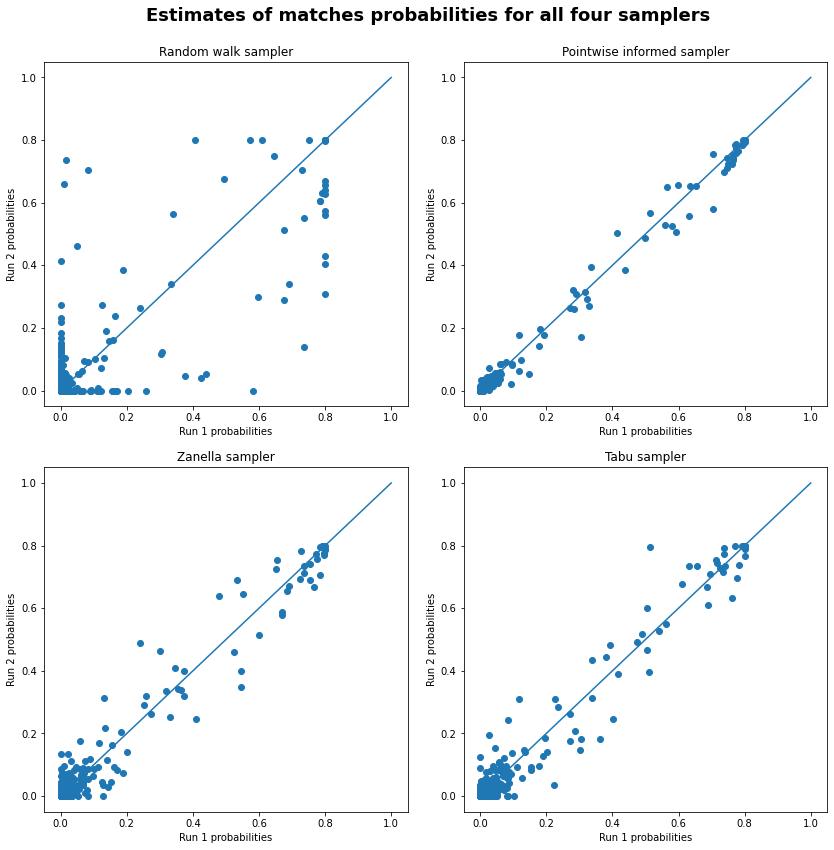

In [9]:
#Plotting the probability comparisons
fig, ax = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle("Estimates of matches probabilities for all four samplers", fontsize=18, fontweight="bold")
fig.tight_layout(h_pad=4, pad=2.5)

#For the random walk sampler
ax[0,0].scatter(rw_probs1, rw_probs2)
ax[0,0].plot(np.arange(0,1,1/N),np.arange(0,1,1/N))
ax[0,0].set_xlabel("Run 1 probabilities")
ax[0,0].set_ylabel("Run 2 probabilities")
ax[0,0].set_title("Random walk sampler")

#For the pointwise sampler
ax[0,1].scatter(pw_probs1, pw_probs2)
ax[0,1].plot(np.arange(0,1,1/N),np.arange(0,1,1/N))
ax[0,1].set_xlabel("Run 1 probabilities")
ax[0,1].set_ylabel("Run 2 probabilities")
ax[0,1].set_title("Pointwise informed sampler")

#For the Zanella sampler
ax[1,0].scatter(z_probs1, z_probs2)
ax[1,0].plot(np.arange(0,1,1/N),np.arange(0,1,1/N))
ax[1,0].set_xlabel("Run 1 probabilities")
ax[1,0].set_ylabel("Run 2 probabilities")
ax[1,0].set_title("Zanella sampler")

#For the Tabu sampler
ax[1,1].scatter(t_probs1, t_probs2)
ax[1,1].plot(np.arange(0,1,1/N),np.arange(0,1,1/N))
ax[1,1].set_xlabel("Run 1 probabilities")
ax[1,1].set_ylabel("Run 2 probabilities")
ax[1,1].set_title("Tabu sampler")

plt.show()